First, let’s have a look at the dataset. It consists of the files: ratings.csv, books.csv, book_tags.csv, tags.csv.

As the name suggests ratings.csv contains all users’s ratings of the books (a total of 980k ratings, for 10,000 books, from 53,424 users), while books.csv contains more information on the books such as author, year, etc. book_tags contains all tag_ids users have assigned to that books and corresponding tag_counts, while tags.csv contains the tag_names corresponding to the tag_ids.



In [39]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [40]:
!ls "/content/gdrive/My Drive/goodbooks-10k/to_read.csv"

'/content/gdrive/My Drive/goodbooks-10k/to_read.csv'


In [41]:
csv_file="/content/gdrive/My Drive/goodbooks-10k/to_read.csv"

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [43]:
df = pd.read_csv(csv_file)

In [44]:
df.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [8]:
df.shape

(912705, 2)

In [45]:
csv2_file="/content/gdrive/My Drive/goodbooks-10k/ratings.csv"

In [46]:
df2 = pd.read_csv(csv2_file)

In [11]:
df2.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [12]:
df2.shape

(981756, 3)

In [47]:
csv3_file="/content/gdrive/My Drive/goodbooks-10k/tags.csv"

In [48]:
df3=pd.read_csv(csv3_file)


In [49]:
df3.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [136]:
csv5_file="/content/gdrive/My Drive/goodbooks-10k/book_tags.csv"

In [137]:
df5=pd.read_csv(csv5_file)

In [138]:
df5.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [52]:
csv4_file="/content/gdrive/My Drive/goodbooks-10k/books.csv"

In [53]:
df4=pd.read_csv(csv4_file)


In [54]:
df4.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [58]:
df4.shape

(10000, 23)

# **Visualizing data**

In [225]:
joint_tag=pd.merge(df3,df5,left_on='tag_id',right_on='tag_id',how='inner')


# **Top 10 rated books**

In [226]:
top_rated=df4.sort_values('average_rating', ascending=False)
top10=top_rated.head(10)
f=['title','small_image_url']
displ=(top10[f])
displ.set_index('title', inplace=True)

In [142]:
from IPython.display import Image, HTML

def path_to_image_html(path):
    '''
     This function essentially convert the image url to 
     '<img src="'+ path + '"/>' format. And one can put any
     formatting adjustments to control the height, aspect ratio, size etc.
     within as in the below example. 
    '''

    return '<img src="'+ path + '""/>'

HTML(displ.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

,small_image_url
title,
The Complete Calvin and Hobbes,
"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)",
"Words of Radiance (The Stormlight Archive, #2)",
Mark of the Lion Trilogy,
ESV Study Bible,
It's a Magical World: A Calvin and Hobbes Collection,
There's Treasure Everywhere: A Calvin and Hobbes Collection,
"Harry Potter Boxset (Harry Potter, #1-7)",
"Harry Potter Collection (Harry Potter, #1-6)",



# **Top 10 most popular books**






In [144]:
pop10=df4.sort_values(by='ratings_count', ascending=False)
f=['title','small_image_url']
pop10=pop10.head(10)

pop10=(pop10[f])
pop10=pop10.set_index('title')

In [145]:
HTML(pop10.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

,small_image_url
title,
"The Hunger Games (The Hunger Games, #1)",
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
"Twilight (Twilight, #1)",
To Kill a Mockingbird,
The Great Gatsby,
The Fault in Our Stars,
The Hobbit,
The Catcher in the Rye,
Pride and Prejudice,


# **Most Common Rating Values**




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


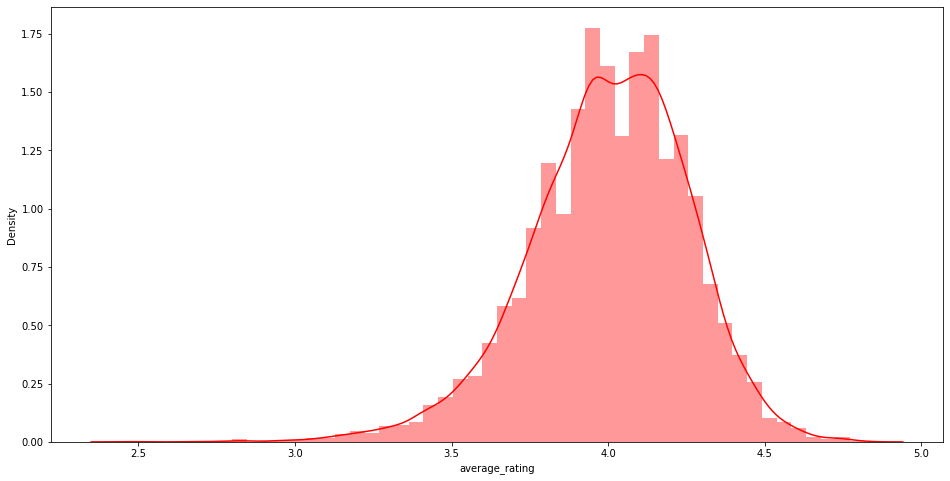

In [147]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.distplot(a=df4['average_rating'], kde=True, color='r')

# **Therefore, the most common rating is somewhere between 3.5 to 4**

What influences a book’s rating?

Next, we can see, whether we can find any associations of features with a book’s rating. For a quick look, let’s first plot the correlation matrix between the books average_rating and some variables. In summary, we see only small correlations between the features and the average rating (last row), indicating that there are no strong relationships between the rating a book receives and meta-variables (like rating counts etc.). This means that the rating depends more strongly on other features (e.g. the quality of the books itself).

In [62]:
df4.ratings_count = df4.ratings_count.astype('int')


In [63]:
df4.sort_values(by = 'ratings_count', ascending = False)[['original_title','ratings_count', 'average_rating' ]][0:10]


,original_title,ratings_count,average_rating
0,The Hunger Games,4780653,4.34
1,Harry Potter and the Philosopher's Stone,4602479,4.44
2,Twilight,3866839,3.57
3,To Kill a Mockingbird,3198671,4.25
4,The Great Gatsby,2683664,3.89
5,The Fault in Our Stars,2346404,4.26
6,The Hobbit or There and Back Again,2071616,4.25
7,The Catcher in the Rye,2044241,3.79
9,Pride and Prejudice,2035490,4.24
8,Angels & Demons,2001311,3.85


In [64]:
most_ratings = df4.sort_values(by = 'ratings_count', ascending = False)[['original_title','ratings_count', 'average_rating', 'image_url' ]][0:10]

# **Printing top books with most number of ratings**

 



In [65]:
import pandas as pd
from IPython.display import Image, HTML
most_ratings['img_html'] = most_ratings['image_url']\
    .str.replace(
        '(.*)', 
        '<img src="\\1" style="max-height:124px;"></img>'
    )
with pd.option_context('display.max_colwidth', 10000):
  
  display(HTML(most_ratings[['original_title', 'img_html', 'ratings_count', 'average_rating' ]].to_html(escape=False)))

,original_title,img_html,ratings_count,average_rating
0,The Hunger Games,,4780653,4.34
1,Harry Potter and the Philosopher's Stone,,4602479,4.44
2,Twilight,,3866839,3.57
3,To Kill a Mockingbird,,3198671,4.25
4,The Great Gatsby,,2683664,3.89
5,The Fault in Our Stars,,2346404,4.26
6,The Hobbit or There and Back Again,,2071616,4.25
7,The Catcher in the Rye,,2044241,3.79
9,Pride and Prejudice,,2035490,4.24
8,Angels & Demons,,2001311,3.85


In [66]:
df4.average_rating = df4.average_rating.astype('float')


In [67]:
#Top books with top average ratings on goodbooks

df4.sort_values(by = 'average_rating', ascending = False)[['original_title','ratings_count', 'average_rating' ]][0:10]

,original_title,ratings_count,average_rating
3627,The Complete Calvin and Hobbes,28900,4.82
3274,NaN,33220,4.77
861,Words of Radiance,73572,4.77
8853,Mark of the Lion Trilogy,9081,4.76
7946,NaN,8953,4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,22351,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,16766,4.74
421,Complete Harry Potter Boxed Set,190050,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",24618,4.73
6919,The Indispensable Calvin and Hobbes: A Calvin ...,14597,4.73


In [69]:
high_rating_books = df4.sort_values(by = 'average_rating', ascending = False)[['original_title','ratings_count','image_url', 'average_rating' ]][0:10]


# **Printing top books with highest average ratings**

In [70]:
high_rating_books['img_html'] = high_rating_books['image_url']\
    .str.replace(
        '(.*)', 
        '<img src="\\1" style="max-height:124px;"></img>'
    )
with pd.option_context('display.max_colwidth', 10000):
  
  display(HTML(high_rating_books[['original_title', 'img_html','ratings_count', 'average_rating' ]].to_html(escape=False)))

,original_title,img_html,ratings_count,average_rating
3627,The Complete Calvin and Hobbes,,28900,4.82
3274,NaN,,33220,4.77
861,Words of Radiance,,73572,4.77
8853,Mark of the Lion Trilogy,,9081,4.76
7946,NaN,,8953,4.76
4482,It's a Magical World: A Calvin and Hobbes Collection,,22351,4.75
6360,There's Treasure Everywhere: A Calvin and Hobbes Collection,,16766,4.74
421,Complete Harry Potter Boxed Set,,190050,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",,24618,4.73
6919,The Indispensable Calvin and Hobbes: A Calvin and Hobbes Treasury,,14597,4.73


In [72]:
authors_with_most_books = pd.DataFrame(df4.authors.value_counts()[0:10]).reset_index()
authors_with_most_books.columns = ['author', 'number_of_books']


In [73]:
authors_with_most_books


,author,number_of_books
0,Stephen King,60
1,Nora Roberts,59
2,Dean Koontz,47
3,Terry Pratchett,42
4,Agatha Christie,39
5,Meg Cabot,37
6,James Patterson,36
7,David Baldacci,34
8,John Grisham,33
9,J.D. Robb,33


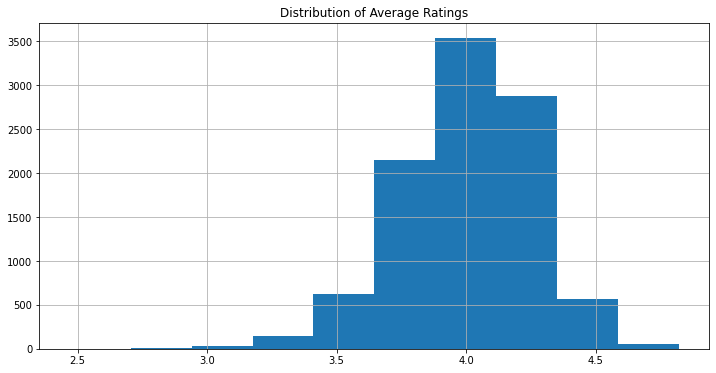

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title('Distribution of Average Ratings')
df4['average_rating'].hist()
display()

In [78]:
ratings.show(100)


+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
|      1|   1169|     4|
|      1|   1185|     4|
|      1|   2077|     4|
|      1|   2487|     4|
|      1|   2900|     5|
|      1|   3662|     4|
|      1|   3922|     5|
|      1|   5379|     5|
|      1|   5461|     3|
|      1|   5885|     5|
|      1|   6630|     5|
|      1|   7563|     3|
|      1|   9246|     1|
|      1|  10140|     4|
|      1|  10146|     5|
|      1|  10246|     4|
|      1|  10335|     4|
|      1|  10610|     5|
|      1|  10944|     5|
|      1|  11854|     4|
|      1|  11927|     4|
|      1|  12471|     5|
|      1|  13282|     5|
|      1|  13544|     5|
|      1|  15494|     5|
|      1|  16377|     4|
|      1|  16913|     5|
|      1|  17434|     5|
|      1|  17663|     5|
|      1|  17984|     5|
|      1|  18031|     5|
|      1|  18313|     5|
|      1|  18361|     4|
|      1|  20076|     3|


In [79]:
ratings.describe().show()


+-------+-----------------+------------------+------------------+
|summary|          book_id|           user_id|            rating|
+-------+-----------------+------------------+------------------+
|  count|           981756|            981756|            981756|
|   mean|4943.275635697668|25616.759933221696|3.8565335989797873|
| stddev|2873.207414896197| 15228.33882588251|0.9839408559620116|
|    min|                1|                 1|                 1|
|    max|            10000|             53424|                 5|
+-------+-----------------+------------------+------------------+



In [80]:
ratings.groupby('book_id').count().show()


+-------+-----+
|book_id|count|
+-------+-----+
|    148|  100|
|    463|  100|
|    471|  100|
|    496|  100|
|    833|  100|
|   1088|  100|
|   1238|  100|
|   1342|  100|
|   1580|  100|
|   1591|  100|
|   1645|  100|
|   1829|  100|
|   1959|  100|
|   2122|  100|
|   2142|  100|
|   2366|  100|
|   2659|  100|
|   2866|  100|
|   3175|  100|
|   3749|  100|
+-------+-----+
only showing top 20 rows



In [82]:
ratings = ratings.select(ratings.user_id,
                         ratings.book_id,
                         ratings.rating.cast("double"))


In [83]:
ratings.show(5)


+-------+-------+------+
|user_id|book_id|rating|
+-------+-------+------+
|    314|      1|   5.0|
|    439|      1|   3.0|
|    588|      1|   5.0|
|   1169|      1|   4.0|
|   1185|      1|   4.0|
+-------+-------+------+
only showing top 5 rows



In [84]:
# Count the total number of ratings in the dataset
numerator = ratings.select("rating").count()

# Count the number of distinct Id's
num_users = ratings.select("user_id").distinct().count()
num_items = ratings.select("book_id").distinct().count()

# Set the denominator equal to the number of users multiplied by the number of items
denominator = num_users * num_items

# Divide the numerator by the denominator
sparsity = (1.0 - (numerator * 1.0)/ denominator) * 100
print("The ratings dataframe is ", "%.2f" % sparsity + "% empty.")

The ratings dataframe is  99.82% empty.


In [85]:
# Min num ratings 
print("Item with the fewest ratings: ")
ratings.groupBy("book_id").count().sort('count').show(10)

Item with the fewest ratings: 
+-------+-----+
|book_id|count|
+-------+-----+
|   7803|    8|
|   9345|   11|
|   9486|   24|
|   1935|   34|
|   9315|   36|
|   9553|   41|
|   8181|   44|
|   9260|   46|
|   9479|   47|
|   9705|   48|
+-------+-----+
only showing top 10 rows



In [86]:
# Group data by user_id, count ratings
(ratings.groupBy("user_id")
    .count()
    .filter("`count` >= 5")
    .orderBy('count', ascending=False)
    .show(n = 10))

+-------+-----+
|user_id|count|
+-------+-----+
|  12874|  200|
|  30944|  200|
|  28158|  199|
|  12381|  199|
|  52036|  199|
|   6630|  197|
|  37834|  197|
|  45554|  197|
|   9806|  196|
|   9668|  196|
+-------+-----+
only showing top 10 rows



In [87]:
(ratings.groupBy("book_id")
    .count()
    .filter("`count` > 1")
    .orderBy('count', ascending=False)
    .show(n = 10))

+-------+-----+
|book_id|count|
+-------+-----+
|    148|  100|
|    463|  100|
|    471|  100|
|    496|  100|
|    833|  100|
|   1088|  100|
|   1238|  100|
|   1342|  100|
|   1580|  100|
|   1591|  100|
+-------+-----+
only showing top 10 rows



Collaborative filtering is a standard method for product recommendations. To get the general idea consider this example:

Imagine you want to read a new book, but you don’t know which one might be worth reading. You have a certain friend, with whom you have talked about some books and you typically have had quite a similar opinion on those books. It would then be a good idea to ask this friend whether he read and liked some books that you don’t know yet. These would be good candidates for your next book.

What I described above is exactly the main idea of the so called user-based collaborative filtering. It works as follows:

You first identify other users similar to the current user in terms of their ratings on the same set of books.
For example, if you liked all the “Lord of the rings” books, you identify users which also liked those books.
2. If you found those similar users you take their average rating of books the current user has not yet read …

So, how did those “Lord of the rings” lovers rate other books? Maybe they rated “The Hobbit” very high.

… and recommend those books with the highest average rating to him.
Accordingly, “The Hobbit” has a high average rating and might be recommended to you.



# **Now, let's split the data into training and test set to use collaborative filtering usingn Alternate Least Square method**


In [88]:
(training, test) = ratings.randomSplit([0.8, 0.2])


In [89]:
test.show(5)


+-------+-------+------+
|user_id|book_id|rating|
+-------+-------+------+
|      1|   4893|   3.0|
|      1|   6285|   4.0|
|      3|   9014|   1.0|
|      7|   1071|   4.0|
|      7|   1646|   3.0|
+-------+-------+------+
only showing top 5 rows



**Let's import ALS and regression evaluator to find RMSE.**


In [90]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

In [91]:
als = ALS( userCol="user_id", itemCol="book_id", ratingCol="rating",
          coldStartStrategy="drop", nonnegative = True, implicitPrefs = False)

In [92]:
type(als)


pyspark.ml.recommendation.ALS

In [95]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator 

param_grid = ParamGridBuilder() \
            .addGrid(als.rank, [10, 50, 75, 100]) \
            .addGrid(als.maxIter, [5, 50, 75, 100]) \
            .addGrid(als.regParam, [.01, .05, .1, .15]) \
            .build()


In [96]:
evaluator = RegressionEvaluator(metricName = "rmse", 
                                labelCol = "rating", 
                                predictionCol = "prediction")
# Print length of evaluator
print ("Num models to be tested using param_grid: ", len(param_grid))

Num models to be tested using param_grid:  64


In [97]:
# Build cross validation using CrossValidator
cv = CrossValidator(estimator = als, 
                    estimatorParamMaps = param_grid, 
                    evaluator = evaluator, 
                    numFolds = 5)


In [98]:
print(cv)


CrossValidator_6ceb979a4dd1


In [99]:
model = als.fit(training)


In [100]:
predictions = model.transform(test)


In [101]:
predictions.show(n = 10)


+-------+-------+------+----------+
|user_id|book_id|rating|prediction|
+-------+-------+------+----------+
|   9165|    148|   3.0| 3.5152016|
|   3922|    148|   3.0| 3.9290137|
|  13034|    148|   4.0|   3.38119|
|  13879|    148|   3.0| 3.3190923|
|  13991|    148|   4.0| 3.7030764|
|  33065|    148|   3.0|  3.582663|
|  50999|    148|   3.0| 3.2119546|
|  10111|    148|   3.0| 3.7067566|
|  23576|    148|   3.0| 2.8398418|
|   2171|    148|   4.0| 3.6491442|
+-------+-------+------+----------+
only showing top 10 rows




Well, the prediction on the test set shows that it is very close to the original rating. Like for example the rating for user_id 14372 was originally 3 and our algorithm predicted it to be 3.13 which is pretty close.

In [104]:
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.9166268320687976


Root-mean-square error = 0.913, On average the mean error is .9 that is the difference between the original rating and the predicted rating. Now, let's predict 10 books and ratings for each user.

In [105]:
# Generate n recommendations for all users
ALS_recommendations = model.recommendForAllUsers(numItems = 10) # n - 10

In [106]:
ALS_recommendations.show(n = 10)


+-------+--------------------+
|user_id|     recommendations|
+-------+--------------------+
|    148|[[5207, 4.613921]...|
|    463|[[1338, 4.6616583...|
|    471|[[9486, 3.3107471...|
|    496|[[1338, 5.671568]...|
|    833|[[8249, 5.1748505...|
|   1088|[[8548, 4.9143286...|
|   1238|[[9531, 5.504425]...|
|   1342|[[4868, 5.006364]...|
|   1580|[[6189, 4.970873]...|
|   1591|[[2831, 5.198179]...|
+-------+--------------------+
only showing top 10 rows



In [107]:
ALS_recommendations.registerTempTable("ALS_recs_temp")


In [108]:
clean_recs = spark.sql("""SELECT user_id,
                            movieIds_and_ratings.book_id AS book_id,
                            movieIds_and_ratings.rating AS prediction
                        FROM ALS_recs_temp
                        LATERAL VIEW explode(recommendations) exploded_table
                            AS movieIds_and_ratings""")
clean_recs.show()

+-------+-------+----------+
|user_id|book_id|prediction|
+-------+-------+----------+
|    148|   5207|  4.613921|
|    148|   9566| 4.5464597|
|    148|   4706|  4.515669|
|    148|   6659| 4.4766703|
|    148|   6920|  4.471873|
|    148|   4344|   4.46501|
|    148|   4483| 4.4535546|
|    148|   5344|  4.435657|
|    148|   7831| 4.4300427|
|    148|   6527|  4.424464|
|    463|   1338| 4.6616583|
|    463|   6077| 4.5936594|
|    463|   7478| 4.5623474|
|    463|   5155| 4.5386806|
|    463|   4638|   4.51455|
|    463|   3953| 4.5087647|
|    463|   6522| 4.4774303|
|    463|   1025|  4.470688|
|    463|   2149| 4.4311438|
|    463|   1865|  4.408757|
+-------+-------+----------+
only showing top 20 rows



In [109]:
# Recommendations for unread books
(clean_recs.join(ratings, ["user_id", "book_id"], "left")
    .filter(ratings.rating.isNull()).show())

+-------+-------+----------+------+
|user_id|book_id|prediction|rating|
+-------+-------+----------+------+
|      1|   2667| 3.9525743|  null|
|     41|   6425|  5.154256|  null|
|     55|   4107|  4.258904|  null|
|     69|   5269| 5.1985683|  null|
|     78|   5134| 2.0409384|  null|
|     90|   8099|  4.925486|  null|
|     91|    780| 4.5384736|  null|
|    111|   8187|  4.873475|  null|
|    123|   2940| 4.4651623|  null|
|    133|    562|  5.084606|  null|
|    149|   3435|  4.605671|  null|
|    198|   3746| 3.8638682|  null|
|    204|   9967|  4.722576|  null|
|    208|   8995| 4.4162664|  null|
|    227|   4674| 3.8169584|  null|
|    257|   6457| 2.0074291|  null|
|    266|   6583|  4.318172|  null|
|    280|   5207| 4.8847136|  null|
|    284|   7401|  5.178077|  null|
|    290|   8187| 5.5795903|  null|
+-------+-------+----------+------+
only showing top 20 rows



In [111]:
new_books = (clean_recs.join(ratings, ["user_id", "book_id"], "left")
    .filter(ratings.rating.isNull()))

In [112]:
print(new_books.count())


521897


In [113]:
new_books.show(5)


+-------+-------+----------+------+
|user_id|book_id|prediction|rating|
+-------+-------+----------+------+
|      1|   2667| 3.9525743|  null|
|     41|   6425|  5.154256|  null|
|     55|   4107|  4.258904|  null|
|     69|   5269| 5.1985683|  null|
|     78|   5134| 2.0409384|  null|
+-------+-------+----------+------+
only showing top 5 rows



 Content Based

Content based filtering on the following factors:

Title

Authors

Average rating


In [149]:
fillnabooks= df4.fillna('')

In [150]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [151]:
features=['original_title','authors','average_rating']
fillednabooks=fillnabooks[features]

In [152]:
fillednabooks = fillednabooks.astype(str)
fillednabooks.dtypes

original_title    object
authors           object
average_rating    object
dtype: object

In [153]:
def create_soup(x):
    return x['original_title']+ ' ' + x['authors'] + ' ' + x['average_rating']

In [154]:
fillednabooks['soup'] = fillednabooks.apply(create_soup, axis=1)


In [156]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fillednabooks['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [157]:
fillednabooks=fillednabooks.reset_index()
indices = pd.Series(fillednabooks.index, index=fillednabooks['original_title'])



In [160]:
def get_recommendations_new(title, cosine_sim=cosine_sim2):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return list(books['original_title'].iloc[movie_indices])

In [163]:
usecols=['book_id', 'original_title']
books_col=df4[usecols]

In [164]:
books_col.dropna()



,book_id,original_title
0,2767052,The Hunger Games
1,3,Harry Potter and the Philosopher's Stone
2,41865,Twilight
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby
...,...,...
9995,7130616,Bayou Moon
9996,208324,Means of Ascent
9997,77431,The Mauritius Command
9998,8565083,Cinderella Ate My Daughter: Dispatches from th...


In [167]:
books_title = df4[['book_id', 'title']]
books_title.head()

,book_id,title
0,2767052,"The Hunger Games (The Hunger Games, #1)"
1,3,Harry Potter and the Sorcerer's Stone (Harry P...
2,41865,"Twilight (Twilight, #1)"
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby


Initialize & Fit CountVectorizer into 'title' -> to create count_matrix this is useful for cosine similarity

Check all words/ features in the vocabulary

Generate cosine similarity

In [168]:
from sklearn.feature_extraction.text import CountVectorizer

#initialize vectorizer
vect = CountVectorizer(analyzer = 'word', ngram_range = (1,2), stop_words = 'english', min_df = 0.002) #min_df = rare words, max_df = most used words
#ngram_range = (1,2) - if used more than  1(value), lots of features or noise

#Fit into the title
vect.fit(books_title['title'])
title_matrix = vect.transform(books_title['title'])
title_matrix.shape

(10000, 261)

In [169]:
#Lets find vocabulary/features
features = vect.get_feature_names()
features

['01',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '39',
 'adventures',
 'alex',
 'alex cross',
 'america',
 'american',
 'angel',
 'angels',
 'anita',
 'anita blake',
 'apprentice',
 'art',
 'bad',
 'batman',
 'beautiful',
 'beauty',
 'best',
 'big',
 'black',
 'blake',
 'blake vampire',
 'blood',
 'blue',
 'body',
 'bone',
 'bones',
 'book',
 'books',
 'born',
 'bosch',
 'bosch universe',
 'boy',
 'boys',
 'broken',
 'brothers',
 'case',
 'cat',
 'child',
 'children',
 'chronicles',
 'circle',
 'city',
 'club',
 'complete',
 'confessions',
 'cross',
 'cycle',
 'dance',
 'dark',
 'dark hunter',
 'darkest',
 'darkness',
 'daughter',
 'davenport',
 'dawn',
 'day',
 'days',
 'dead',
 'death',
 'death death',
 'detective',
 'devil',
 'diaries',
 'diary',
 'die',
 'discworld',
 'dog',
 'don',
 'dragon',
 'dream',
 'dreams',
 'earth',
 'empire',
 'end',
 'fall',
 'fallen',
 'family',
 'fear',
 'files',
 'food',
 'forever',
 'forgotten',
 'forgotten realms',
 'game',
 'garden',
 'girl'

In [171]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_titles = cosine_similarity(title_matrix, title_matrix)
cosine_sim_titles.shape

#Get books which are similar to a given title
title_id = 100
books_title['title'].iloc[title_id]

#Find out what features have been considered  by the vectorizer for a given title ?
feature_array = np.squeeze(title_matrix[title_id].toarray()) #squeeze activity matrix into array
idx = np.where(feature_array > 0)
idx[0]
[features[x] for x in idx[0]]

['day', 'pretty']

In [172]:
idx[0]

array([ 63, 179])

In [173]:
n = 15 #how many books to be recommended
top_n_idx = np.flip(np.argsort(cosine_sim_titles[title_id,]), axis = 0)[0:n]
top_n_sim_values = cosine_sim_titles[title_id, top_n_idx]
top_n_sim_values

array([1.        , 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678,
       0.70710678, 0.70710678, 0.70710678, 0.70710678, 0.70710678])

In [174]:
top_n_idx = top_n_idx[top_n_sim_values > 0]
#Matching books
books_title['title'].iloc[top_n_idx]

100                                Me Talk Pretty One Day
3729                                            Labor Day
988                                 The Day of the Jackal
836                             Every Day (Every Day, #1)
2348    No Easy Day: The Firsthand Account of the Miss...
3311                                          Pretty Baby
6804                     Graduation Day (The Testing, #3)
6886                                 Day Watch (Watch #2)
5765                          The Given Day (Coughlin #1)
783                                      For One More Day
9210             Beyond Exile (Day by Day Armageddon,# 2)
9703    The Pretty Committee Strikes Back (The Clique,...
9637                                 Day 21 (The 100, #2)
7330                                      Pretty in Plaid
7707                            A Grown-Up Kind of Pretty
Name: title, dtype: object

In [175]:
def return_sim_books(title_id, title_matrix, vectorizer, top_n = 10):
    
    # generate sim matrix
    sim_matrix = cosine_similarity(title_matrix, title_matrix)
    features = vectorizer.get_feature_names()

    top_n_idx = np.flip(np.argsort(sim_matrix[title_id,]),axis=0)[0:top_n]
    top_n_sim_values = sim_matrix[title_id, top_n_idx]
    
    # find top n with values > 0
    top_n_idx = top_n_idx[top_n_sim_values > 0]
    scores = top_n_sim_values[top_n_sim_values > 0]
    
    
    # find features from the vectorized matrix
    sim_books_idx = books_title['title'].iloc[top_n_idx].index
    words = []
    for book_idx in sim_books_idx:
        try:
            feature_array = np.squeeze(title_matrix[book_idx,].toarray())
        except:
            feature_array = np.squeeze(title_matrix[book_idx,])
        idx = np.where(feature_array > 0)
        words.append([" , ".join([features[i] for i in idx[0]])])
        
    # collate results
    res = pd.DataFrame({"book_title" : books_title['title'].iloc[title_id],
           "sim_books": books_title['title'].iloc[top_n_idx].values,"words":words,
           "scores":scores}, columns = ["book_title","sim_books","scores","words"])
    
    
    return res

In [180]:
vect = CountVectorizer(analyzer='word',ngram_range=(1,2),stop_words='english', min_df = 0.001)
vect.fit(books_title['title'])
title_matrix = vect.transform(books_title['title'])
print(books_title['title'][10])
return_sim_books(10,title_matrix,vect,top_n=10)

The Kite Runner


,book_title,sim_books,scores,words


Using CountVectorizer we could extract text from book titles and recommend similar titles. A limitation I came across was for titles like "The Kite Runner" & "The Dinner". It was unable to recommend similar books because of the rare words like kite and dinner in the dataset so we have to look at other better ways for recommendations.

Further steps, I will use Tf-Idf and Rake to see which of these give us better results.

Initialize Tfidf vectorizer & fit into title column
Calculate cosine similarity

Convert all titles into a Series associated with book index numbers

Function that gets book recommendations based on the cosine similarity score of book titles

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1,2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(books_title['title'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [181]:
titles = books_title['title']
indices = pd.Series(books_title.index, index = books_title['title']) #converting all titles into a Series

#Function that gets book recommendations based on the cosine similarity score of book titles
def book_recommendations(title, n):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
    sim_scores = sim_scores[1:n+1]
    book_indices = [i[0] for i in sim_scores]
    return titles.iloc[book_indices]

In [182]:
#Recommend n books for a book having index 1
book_index = 10
n = 20

print(books_title['title'][book_index])
book_recommendations(books_title.title[book_index],n)

The Kite Runner


8946                                        Once a Runner
90                      The Maze Runner (Maze Runner, #1)
375                      The Death Cure (Maze Runner, #3)
945                    The Kill Order (Maze Runner, #0.5)
258                   The Scorch Trials (Maze Runner, #2)
6711    Ultramarathon Man: Confessions of an All-Night...
0                 The Hunger Games (The Hunger Games, #1)
1       Harry Potter and the Sorcerer's Stone (Harry P...
2                                 Twilight (Twilight, #1)
3                                   To Kill a Mockingbird
4                                        The Great Gatsby
5                                  The Fault in Our Stars
6                                              The Hobbit
7                                  The Catcher in the Rye
8                   Angels & Demons  (Robert Langdon, #1)
9                                     Pride and Prejudice
11                              Divergent (Divergent, #1)
12            

In [183]:
book_recommendations('A Tale of Two Cities',3)

5871    A Tale of Two Cities / Great Expectations
2697                             Invisible Cities
1699                    A Tale for the Time Being
Name: title, dtype: object

In [198]:
content_data = df4[['original_title','authors','average_rating']]
content_data = content_data.astype(str)

content_data['content'] = content_data['original_title'] + ' ' + content_data['authors'] + ' ' + content_data['average_rating']

content_data = content_data.reset_index()
indices = pd.Series(content_data.index, index=content_data['original_title'])

In [199]:
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(content_data['authors'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(10000, 6175)

In [200]:
cosine_sim_author = linear_kernel(tfidf_matrix, tfidf_matrix)

author wise recommodation

In [35]:


In [201]:
def get_recommendations_books(title, cosine_sim=cosine_sim_author):
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim_author[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return list(content_data['original_title'].iloc[book_indices])

In [202]:
def author_book_shows(book):
    for book in book:
        print(book)

In [204]:
books1 = get_recommendations_books('The Hobbit', cosine_sim_author)
author_book_shows(books1)

The Hobbit or There and Back Again
 The Fellowship of the Ring
The Two Towers
The Return of the King
The Lord of the Rings
The Hobbit and The Lord of the Rings
Unfinished Tales of Númenor and Middle-Earth
Nikola Tesla: Imagination and the Man That Invented the 20th Century
Entwined
The Children of Húrin


In [203]:
books2 =get_recommendations_books('Shadow Kiss', cosine_sim_author)
author_book_shows(books2)

Frostbite
Shadow Kiss
Spirit Bound
Blood Promise
Last Sacrifice 
Bloodlines
The Golden Lily
The Indigo Spell
The Fiery Heart
nan


In [205]:
books3 = get_recommendations_books('Harry Potter and the Goblet of Fire', cosine_sim_author)
author_book_shows(books3)

Harry Potter and the Order of the Phoenix
Harry Potter and the Chamber of Secrets
Harry Potter and the Goblet of Fire
Harry Potter and the Deathly Hallows
Harry Potter and the Half-Blood Prince
Harry Potter Boxed Set Books 1-4
nan
Harry Potter and the Prisoner of Azkaban
The Casual Vacancy
The Tales of Beedle the Bard


# **content based filtering on multiple matrix**

In [206]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(content_data['content'])

cosine_sim_content = cosine_similarity(count_matrix, count_matrix)

In [207]:
def get_recommendations(title, cosine_sim=cosine_sim_content):
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim_content[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return list(content_data['original_title'].iloc[book_indices])

In [208]:
def book_shows(book):
    for book in book:
        print(book)

In [209]:
books4 = get_recommendations('The Hobbit', cosine_sim_content)
book_shows(books4)

The Hobbit or There and Back Again
The Hobbit and The Lord of the Rings
No, David!
The History of the Hobbit, Part One: Mr. Baggins
David Gets in Trouble
nan
The Silmarillion
The Children of Húrin
Unfinished Tales of Númenor and Middle-Earth
The Two Towers


In [210]:
books5 =get_recommendations('Shadow Kiss', cosine_sim_content)
book_shows(books5)

Spirit Bound
Silver Shadows
Frostbite
nan
Last Sacrifice 
Bloodlines
nan
Storm Born
Succubus On Top
Blood Promise


In [211]:
books6 =get_recommendations('The Two Towers', cosine_sim_content)
book_shows(books6)

Towers of Midnight
The Silmarillion
The Children of Húrin
Unfinished Tales of Númenor and Middle-Earth
The Hobbit or There and Back Again
Reckless
 The Fellowship of the Ring
The Return of the King
The Lord of the Rings
Last Sacrifice 


In [212]:
books7 = get_recommendations('Harry Potter and the Goblet of Fire', cosine_sim_content)
book_shows(books7)

Harry Potter and the Prisoner of Azkaban
Harry Potter and the Philosopher's Stone
Harry Potter and the Order of the Phoenix
Harry Potter and the Chamber of Secrets
Harry Potter and the Deathly Hallows
Harry Potter and the Half-Blood Prince
Harry Potter Boxed Set Books 1-4
Harry Potter Collection (Harry Potter, #1-6)
nan
Complete Harry Potter Boxed Set


Most of the books in the wishlist are predicted as 4.5 or more which is expected.
